# k-means Clustering of Movie Ratings

Here we will explore the similarities and differences in people's tastes in movies based on how they rate different movies

The data we'll be using comes from the [MovieLens](https://movielens.org/) [user rating dataset](https://grouplens.org/datasets/movielens/). 

## Dataset overview
The dataset has two files. We'll import them both into pandas dataframes:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper

# Importing the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()
movies.shape

(9125, 3)

In [2]:
# Importing the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()
#ratings.info()
#ratings.describe()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100004  ratings of  9125  movies.



## Romance vs. Scifi
Let's start by taking a subset of users, and seeing what their preferred genres are. We're hiding the most data preprocessing in helper functions so the focus is solely on main part of project i.e clustering.

In [4]:
# Calculating the average rating of romance and scifi movies

genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,3.50,2.40
2,3.59,3.80
3,3.65,3.14
4,4.50,4.26
5,4.08,4.00


The function `get_genre_ratings` calculates each user's average rating of all romance movies and all scifi movies. Let's bias our dataset a little by removing people who like both scifi and romance, just so that our clusters tend to define them as liking one genre more than the other.

In [5]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()
biased_dataset.tail()

Number of records:  183


,index,avg_romance_rating,avg_scifi_rating
178,662,3.44,3.00
179,666,2.40,2.80
180,669,3.25,2.88
181,1,3.50,2.40
182,2,3.59,3.80


So we can see we have 183 users, and for each user we have their average rating of the romance and scifi movies they've watched.

Let us plot this dataset:

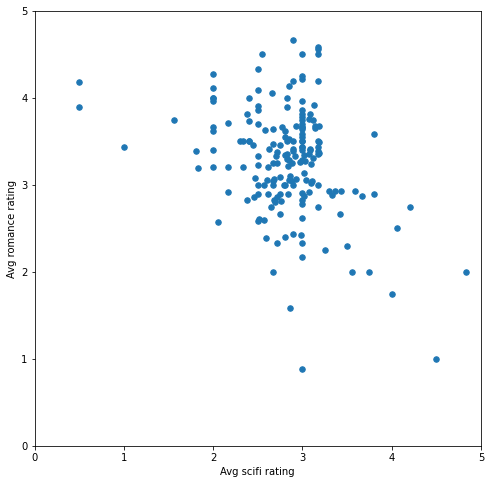

In [6]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

breaking the sample down into two groups using k-means

In [7]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values


* Import [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* Prepare KMeans with n_clusters = 2
* Pass the dataset **X** to KMeans' fit_predict method and retrieve the clustering labels into *predictions*

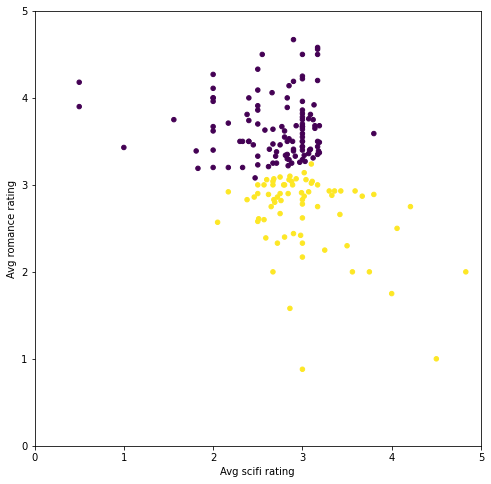

In [8]:
# Importing KMeans
from  sklearn.cluster import KMeans

# Creating an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)

# using fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)

# Plotting
helper.draw_clusters(biased_dataset, predictions)

We can see that the groups are mostly based on how each person rated romance movies. If their average rating of romance movies is over 3 stars, then they belong to one group. Otherwise, they belong to the other group.

Now breaking them down to three groups

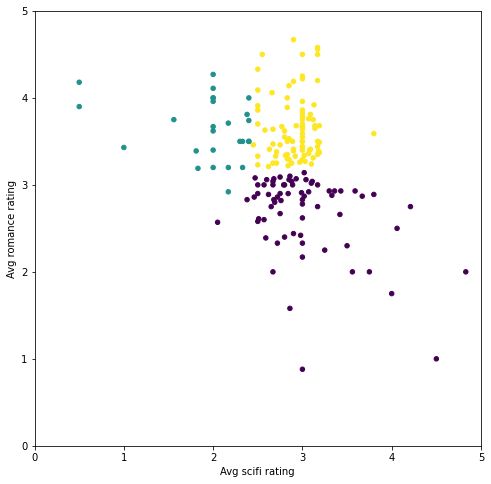

In [9]:

# Creating an instance of KMeans to find three clusters
kmeans_2 =  KMeans(n_clusters=3)

# using fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)


# Plotting
helper.draw_clusters(biased_dataset, predictions_2)

Now the average scifi rating is starting to come into play. The groups are:
 * people who like romance but not scifi
 * people who like scifi but not romance
 * people who like both scifi and romance
 
Let's add one more group

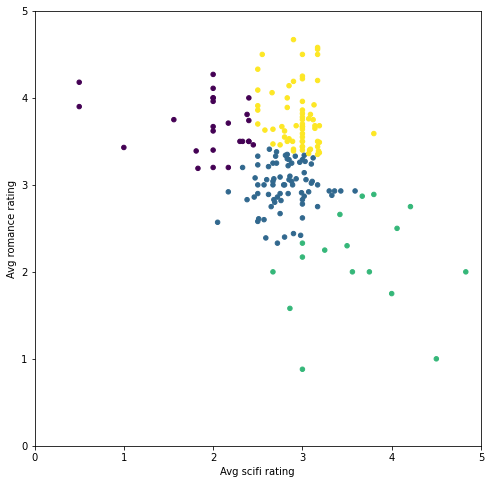

In [10]:
# Creating an instance of KMeans to find four clusters
kmeans_3 = KMeans(n_clusters=4)

# using fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plotting
helper.draw_clusters(biased_dataset, predictions_3)

We can see that the more clusters we break our dataset down into, the more similar the tastes of the population of each cluster to each other.

## Choosing K
so we can cluster our points into any number of clusters. What's the right number of clusters for this dataset

There are [several](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) ways of choosing the number of clusters, k. We'll implment a simple one called "Silhoutte Score". The silhoutte score works by plotting the ascending values of k versus the total error calculated using that k. 

#### Calculating total error
One way to calculate the error is squared error. Say we're calculating the error for k=2. We'd have two clusters each having one "centroid" point. For each point in our dataset, we'd subtract its coordinates from the centroid of the cluster it belongs to. We then square the result of that subtraction (to get rid of the negative values), and sum the values. If we sum these error values, we'd get the total error for all points when k=2.

We will do the same for each k (between 1 and, say, the number of elements in our dataset)

In [11]:
# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)

# Calculating error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]


C:\Users\LENOVO\movie recommender\helper.py:35: ConvergenceWarning: Number of distinct clusters (178) found smaller than n_clusters (182). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k).fit(data)


In [12]:
# values of K vs the silhouette score of running K-means with that value of k
list(zip(possible_k_values, errors_per_k))

[(2, 0.3558817876472827),
 (7, 0.3864329667336625),
 (12, 0.34484384039030563),
 (17, 0.34834068017896974),
 (22, 0.36568522042814366),
 (27, 0.3727769418687242),
 (32, 0.3512352936783931),
 (37, 0.3592569750970063),
 (42, 0.3843976613609798),
 (47, 0.35878472795540267),
 (52, 0.38573304575450496),
 (57, 0.36314566004279797),
 (62, 0.34552565555406883),
 (67, 0.36013979600574897),
 (72, 0.35818300236335604),
 (77, 0.34370525600312496),
 (82, 0.31629638722736636),
 (87, 0.3372051904053419),
 (92, 0.33781012073686195),
 (97, 0.3165286245351695),
 (102, 0.3042214283699769),
 (107, 0.3029623725850764),
 (112, 0.2911851550149241),
 (117, 0.2796361793077346),
 (122, 0.28447967798568013),
 (127, 0.25987644583099717),
 (132, 0.26109206941021385),
 (137, 0.23469709171037983),
 (142, 0.2171360931300339),
 (147, 0.20182822590017613),
 (152, 0.17722243666713558),
 (157, 0.16623334556540564),
 (162, 0.1556499460287056),
 (167, 0.12920960729960135),
 (172, 0.09984309419920603),
 (177, 0.064230120163

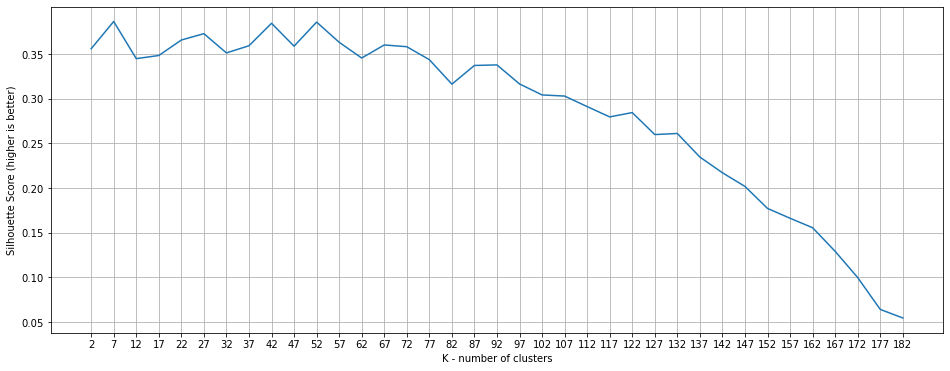

In [13]:
# Plotting the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Looking at this graph, good choices for k include 7, 22, 27, 32, amongst other values (with a slight variation between different runs). Increasing the number of clusters (k) beyond that range starts to result in worse clusters (according to Silhouette score)

our pick would be k=7 because it's easier to visualize:

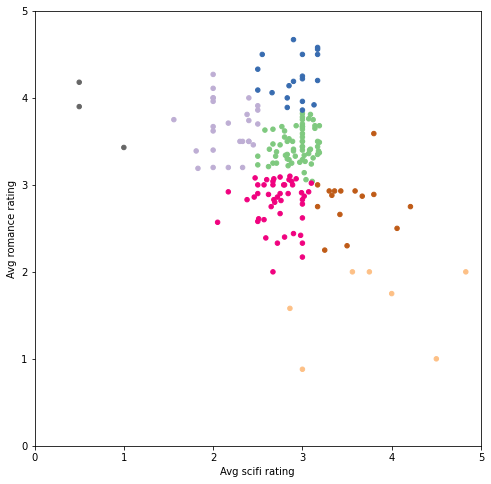

In [14]:
# Creating an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)

# using fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)

# plotting
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent') 


## Increasing dimension to three
So far, we've only been looking at how users rated romance and scifi movies. Let's throw another genre into the mix. Let's add the Action genre.

Our dataset now looks like this:

In [15]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()


Number of records:  183


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,1,3.50,2.40,2.80
1,3,3.65,3.14,3.47
2,6,2.90,2.75,3.27
3,7,2.93,3.36,3.29
4,12,2.89,2.62,3.21


In [16]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

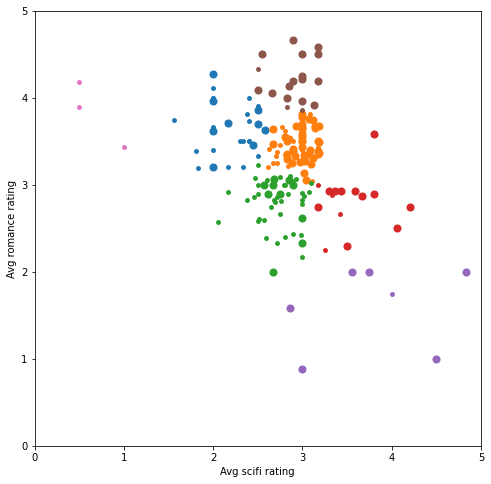

In [17]:
# Creating an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)

# using fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X)

# plotting
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

We're still using the x and y axes for scifi and romance respectively. We are using the size of the dot to roughly code the 'action' rating (large dot for avg ratings over than 3, small dot otherwise).

We can start seeing the added genre is changing how the users are clustered. The more data we give to k-means, the more similar the tastes of the people in each group would be. Unfortunately, though, we lose the ability to visualize what's going on past two or three dimensions if we continue to plot it this way.

## Movie-level Clustering
let's take a look at how users rated individual movies. To do that, we'll shape the dataset in the form of userId vs user rating for each movie. For example, let's look at a subset of the dataset:

In [18]:
# Merging the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (671, 9064) 

Subset example:


title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


The dominance of NaN values presents the first issue. Most users have not rated and watched most movies. Datasets like this are called "sparse" because only a small number of cells have values. 

To get around this, let's sort by the most rated movies, and the users who have rated the most number of movies. That will present a more 'dense' region when we peak at the top of the dataset.

If we're to choose the most-rated movies vs users with the most ratings, it would look like this:

In [19]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()

dataset dimensions:  (18, 30)


title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),"Matrix, The (1999)",Toy Story (1995),Schindler's List (1993),Terminator 2: Judgment Day (1991),...,Dances with Wolves (1990),Fight Club (1999),"Usual Suspects, The (1995)",Seven (a.k.a. Se7en) (1995),"Lion King, The (1994)","Godfather, The (1972)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Apollo 13 (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
29,5.0,5.0,5.0,4.0,4.0,4.0,3.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,4.0,2.0
508,4.0,5.0,4.0,4.0,5.0,3.0,4.5,3.0,5.0,2.0,...,5.0,4.0,5.0,4.0,3.5,5.0,4.5,3.0,2.0,4.0
14,1.0,5.0,2.0,5.0,5.0,3.0,5.0,2.0,4.0,4.0,...,3.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0
72,5.0,5.0,5.0,4.5,4.5,4.0,4.5,5.0,5.0,3.0,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,3.5,3.0,5.0
653,4.0,5.0,5.0,4.5,5.0,4.5,5.0,5.0,5.0,5.0,...,4.5,5.0,5.0,4.5,5.0,4.5,5.0,5.0,4.0,5.0


### Drawing heatmap
Heatmap is a good way for visualizing these ratings (and later, clusters) when we look at bigger subsets.

Let's use colors instead of the number ratings:

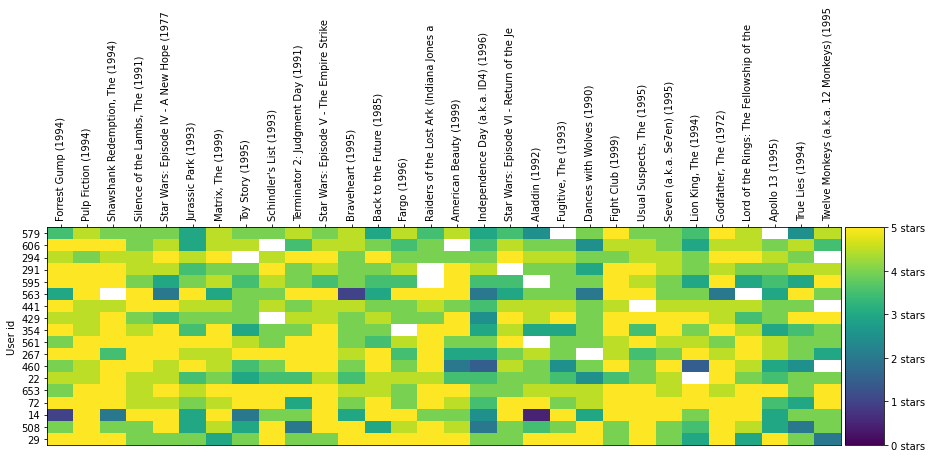

In [20]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

Each column is a movie. Each row is a user. The color of the cell is how the user rated that movie based on the scale on the right of the graph.

Notice some cells are white This means the respective user did not rate that movie. Real-world datasets can often be sparse and not have a value in each cell of the dataset. This makes it less straightforward to cluster users directly by their movie ratings as k-means generally does not like missing values.

For performance reasons, we'll only use ratings for 1000 movies (out of the 9000+ available in the dataset).

In [21]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the [sparse csr matrix](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.sparse.csr_matrix.html) type defined in the SciPi library. 

To convert from a pandas dataframe to a sparse matrix, we'll have to convert to SparseDataFrame, then use pandas' `to_coo()` method for the conversion.

Note: `to_coo()` was only added in later versions of pandas. If you run into an error with the next cell, make sure pandas is up to date.

In [22]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
#sparse_ratings = csr_matrix(pd.DataFrame.sparse.from_spmatrix(most_rated_movies_1k).to_coo())
#pd.DataFrame.sparse.from_spmatrix()

<ipython-input-22-5d61820963fd>:1: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())
F:\ANACONDA\lib\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)


## Final Clustering
With k-means, we have to specify k, the number of clusters. Let's arbitrarily try k=20 (A better way to pick k is as illustrated above with the silhoutte score). 

In [23]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

To visualize these clusters, we'll plot each cluster as a heat map:

     index  Forrest Gump (1994)  Pulp Fiction (1994)  \
0        0                  NaN                  NaN   
1        1                  3.0                  4.0   
2        2                  5.0                  4.5   
3        3                  5.0                  5.0   
4        4                  4.0                  NaN   
..     ...                  ...                  ...   
666    666                  4.0                  5.0   
667    667                  NaN                  5.0   
668    668                  NaN                  NaN   
669    669                  NaN                  NaN   
670    670                  5.0                  4.0   

     Shawshank Redemption, The (1994)  Silence of the Lambs, The (1991)  \
0                                 NaN                               NaN   
1                                 NaN                               3.0   
2                                 5.0                               3.0   
3                          

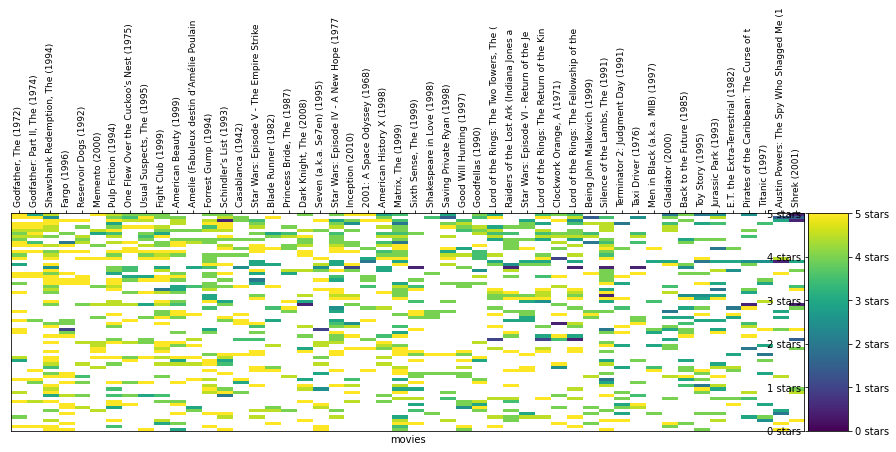

cluster # 14
# of users in cluster: 43. # of users in plot: 43


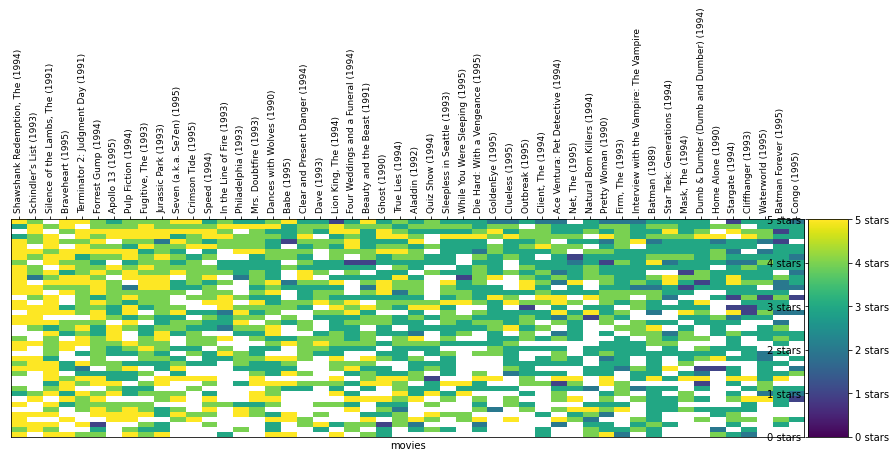

cluster # 9
# of users in cluster: 26. # of users in plot: 26


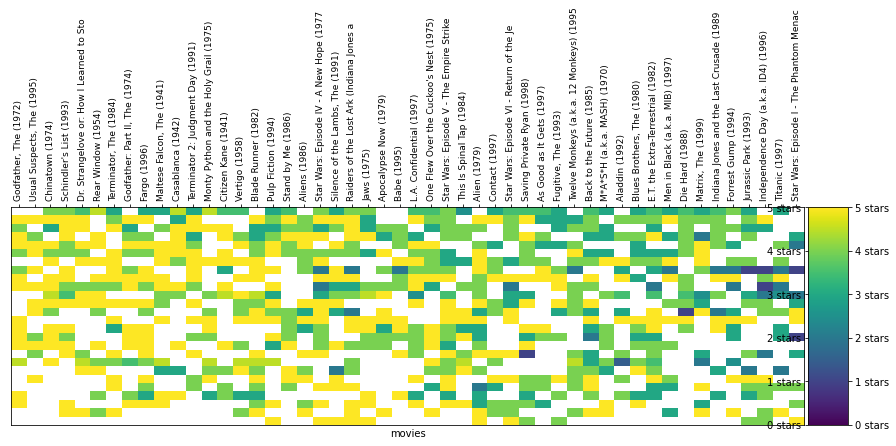

cluster # 1
# of users in cluster: 84. # of users in plot: 70


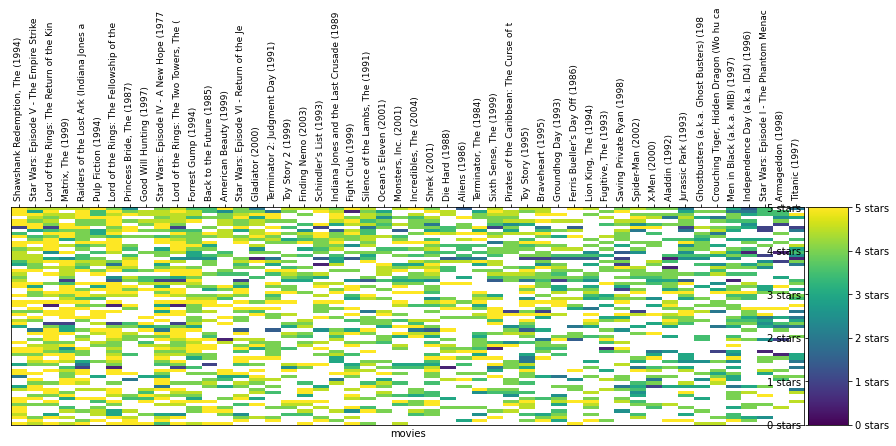

cluster # 3
# of users in cluster: 62. # of users in plot: 62


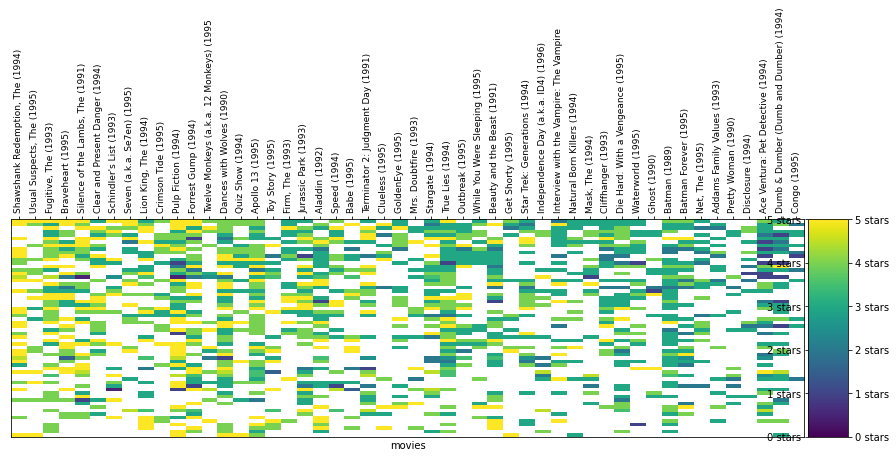

cluster # 4
# of users in cluster: 22. # of users in plot: 22


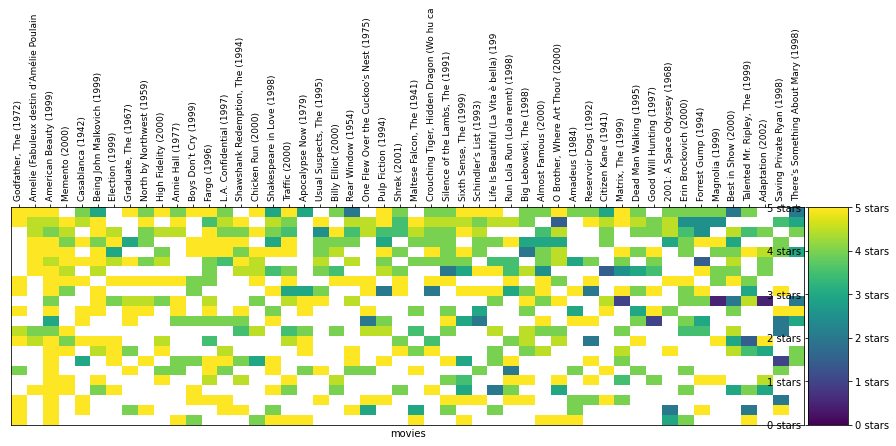

cluster # 10
# of users in cluster: 37. # of users in plot: 37


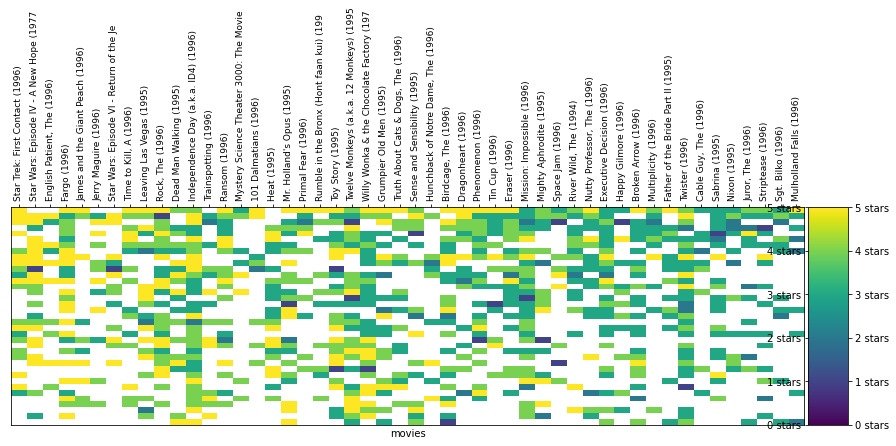

cluster # 15
# of users in cluster: 35. # of users in plot: 35


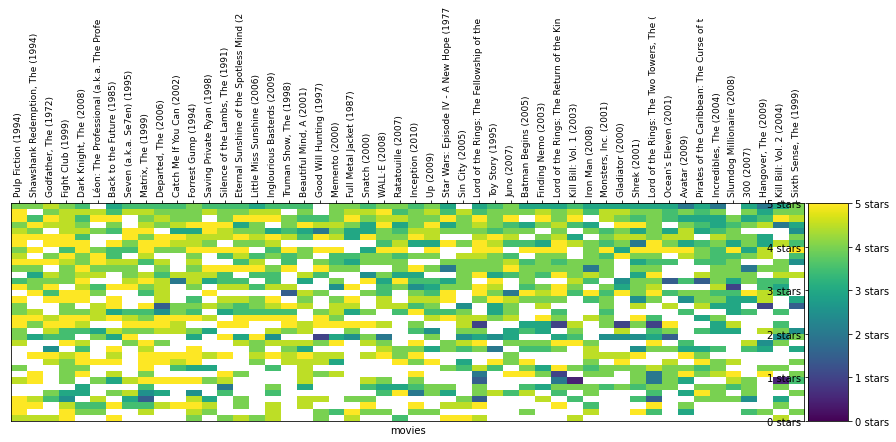

cluster # 12
# of users in cluster: 31. # of users in plot: 31


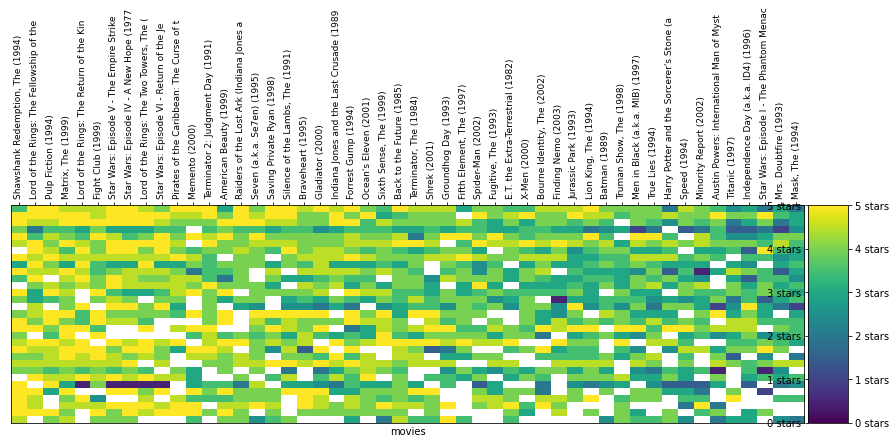

In [24]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

user_data=clustered
print(user_data)
helper.draw_movie_clusters(clustered, max_users, max_movies)


In [25]:
clustered.shape

(671, 1002)

## Prediction
Picking a cluster or user and predicting movies

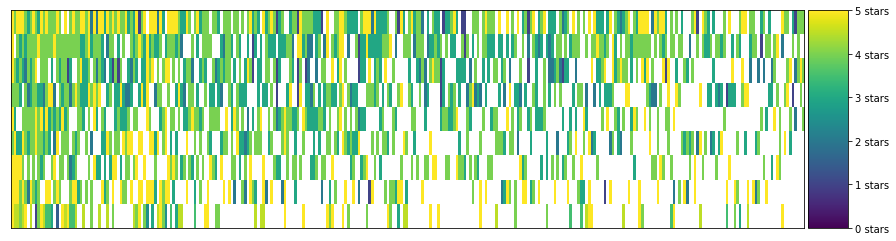

In [26]:
# Picking a cluster ID from the clusters above
cluster_number = 0

n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

And the actual ratings in the cluster look like this:

In [27]:
cluster.fillna('').head()
#cluster.index

,Forrest Gump (1994),Aladdin (1992),You've Got Mail (1998),"Wedding Singer, The (1998)","Rock, The (1996)",Outbreak (1995),Groundhog Day (1993),Speed (1994),Men in Black (a.k.a. MIB) (1997),Saving Private Ryan (1998),...,Lethal Weapon 4 (1998),Fried Green Tomatoes (1991),Casper (1995),Robin Hood (1973),Léon: The Professional (a.k.a. The Professional) (Léon) (1994),"Brady Bunch Movie, The (1995)",Hot Shots! Part Deux (1993),RoboCop (1987),"Sword in the Stone, The (1963)",Young Guns (1988)
6,5.0,4,5,5,5,4,3,4,5,4,...,,5,4,4,,3,1,4,4,4
5,5.0,,4,3,4,3,4,4,4,4,...,,2,,,,4,,4,,
4,5.0,4,3,4,3,2,4,3,4,5,...,,,,4,5,,2,4,5,4
8,4.0,4,4,3,,4,2,3,4,4,...,,,4,5,,1,,,4,
3,5.0,3,,,4,4,4,4,4,5,...,4,,,,4,,2,,,4


Pick a blank cell from the table. It's blank because that user did not rate that movie. Since the user is in a cluster of users that seem to have similar taste, we can take the average of the votes for that movie in this cluster, and that would be a reasonable predicition.

In [28]:
# Filling in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Picking a movie from the table above since we're looking at a subset
movie_name = 'Star Wars: Episode IV - A New Hope (1977)'

cluster[movie_name].mean()

4.8


## Recommendation
We have used k-means to cluster users according to their ratings. This lead us to clusters of users with similar ratings and thus generally a similar taste in movies. Based on this, when one user did not have a rating for a certain movie  we averaged the ratings of all the other users in the cluster, and that was our guess to how this one user would like the movie.

Using this logic, if we calculate the average score in this cluster for every movie, we'd have an understanding for how this 'taste cluster' feels about each movie in the dataset. 


In [29]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Forrest Gump (1994)                     4.777778
Aladdin (1992)                          4.312500
You've Got Mail (1998)                  4.187500
Wedding Singer, The (1998)              3.875000
Rock, The (1996)                        4.312500
Outbreak (1995)                         3.750000
Groundhog Day (1993)                    3.250000
Speed (1994)                            3.937500
Men in Black (a.k.a. MIB) (1997)        4.125000
Saving Private Ryan (1998)              3.875000
True Lies (1994)                        3.875000
Fugitive, The (1993)                    4.125000
Mrs. Doubtfire (1993)                   3.562500
Silence of the Lambs, The (1991)        4.312500
Pretty Woman (1990)                     3.928571
Superman (1978)                         3.857143
Clueless (1995)                         3.571429
Independence Day (a.k.a. ID4) (1996)    4.071429
Mummy, The (1999)                       3.714286
American Pie (1999)                     4.142857
dtype: float64

#### Final step of project

When a user logs in to our app, we can now show them recommendations that are appropriate to their taste. The formula for these recommendations is to select the cluster's highest-rated movies that the user did not rate yet.


In [30]:
# Picking a user ID from the dataset
# Look at the table above outputted by the command "cluster.fillna('').head()" 
# and pick one of the user ids (the first column in the table)
user_id = 654

cluster_number=clustered[clustered['index']==user_id]
print(int(cluster_number['group']))
cluster = clustered[clustered.group == int(cluster_number['group'])].drop(['index', 'group'], axis=1)

# user_cluster=user_data.iloc[user_id+1,-1]
# print(user_cluster)
# Getting all of this user's ratings
user_2_ratings  = cluster.loc[user_id, :]
# user_2_ratings  = user_data.loc[user_id, :]
# movies this user have not rated already
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# predicted rating for the movies that user have not seen
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
# avg_ratings = pd.concat([user_2_unrated_movies, user_data.mean()], axis=1, join='inner').loc[:,0]
# sorting by rating so the highest rated movies are presented first

avg_ratings.sort_values(ascending=False)[:20]

1


Fried Green Tomatoes (1991)                       5.000000
Mr. Smith Goes to Washington (1939)               5.000000
And Your Mother Too (Y tu mamá también) (2001)    5.000000
Duck Soup (1933)                                  5.000000
Sabrina (1995)                                    5.000000
Ghost in the Shell (Kôkaku kidôtai) (1995)        5.000000
Gangs of New York (2002)                          5.000000
Sherlock Holmes: A Game of Shadows (2011)         5.000000
Modern Times (1936)                               5.000000
Hurt Locker, The (2008)                           5.000000
Sophie's Choice (1982)                            5.000000
How to Train Your Dragon (2010)                   4.800000
Chinatown (1974)                                  4.750000
Prestige, The (2006)                              4.750000
Last of the Mohicans, The (1992)                  4.750000
Toy Story 3 (2010)                                4.750000
King's Speech, The (2010)                         4.7500